In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Delivery_time -> Predict delivery time using sorting time

In [2]:
data1=pd.read_csv("C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 4/delivery_time.csv")
data1.copy()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data=data1.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

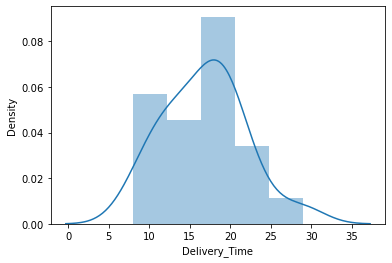

In [5]:
sns.distplot(data['Delivery_Time'])

C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

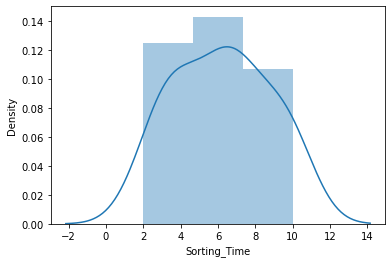

In [6]:
sns.distplot(data['Sorting_Time'])

In [7]:
model=smf.ols('Delivery_Time~Sorting_Time',data=data).fit()

In [8]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [9]:
model.tvalues,model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

 p < 0.05 ; So we can proceed with predicting Delivery Time using Sorting Time.

Manual Check :

Let Sorting Time = 5 ;

Therefore, Delivery Time = 6.58 + 1.65 * Sorting Time

Delivery Time = 6.58 + 8.25 = 14.83

In [10]:
testdata=pd.Series([5])
data_pred=pd.DataFrame(testdata,columns=['Sorting_Time'])

In [11]:
model.predict(data_pred)

0    14.827833
dtype: float64

In [12]:
model.rsquared,model.aic

(0.6822714748417231, 106.71400170798609)

R^2 value < 0.75 is not a good Fit Line, so we will validate model and rerun our model.

Text(0.5, 1.0, 'Normal Q-Q plot  of residual')

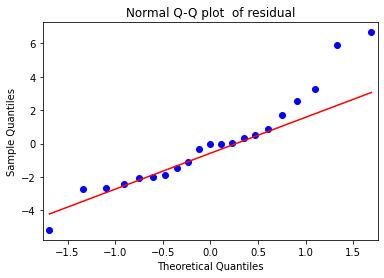

In [13]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot  of residual')

In [14]:
list(np.where(model.resid>2))

[array([ 2,  3,  4, 20], dtype=int64)]

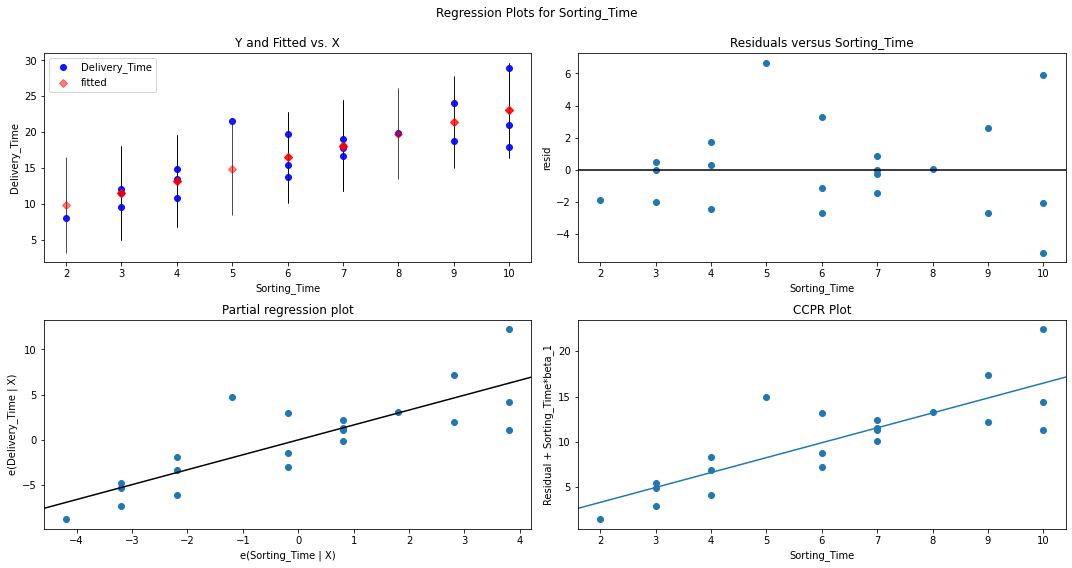

In [15]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Sorting_Time',fig=fig)

In [16]:
model_influence=model.get_influence()
(c,x)=model_influence.cooks_distance

<function matplotlib.pyplot.show(close=None, block=None)>

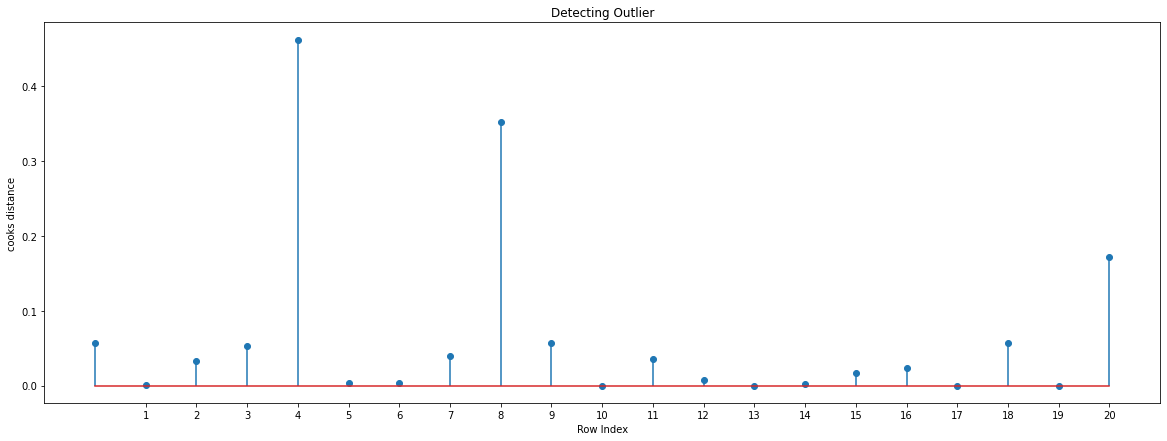

In [17]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('cooks distance')
plt.title('Detecting Outlier')
plt.xticks(range(1,21))
plt.show

In [18]:
np.argmax(c),max(c)

(4, 0.4620530412650316)

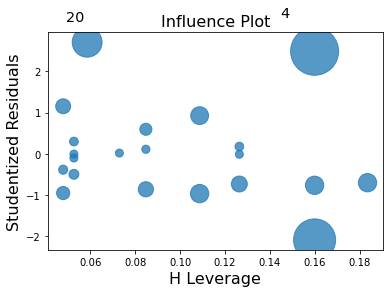

In [19]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [20]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff=3*((k+1)/n)
k,n,leverage_cutoff

(2, 21, 0.42857142857142855)

In [21]:
data1[data1.index.isin([4,8,9,20])]

,Delivery Time,Sorting Time
4,29.00,10
8,17.90,10
9,18.75,9
20,21.50,5


In [22]:
data2=pd.read_csv("C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 4/delivery_time.csv")
data_new=data2.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})
a=data_new.drop(data2.index[[4,8,20]],axis=0).reset_index()
a=a.drop(['index'],axis=1)
a


,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [23]:
final_model=smf.ols("Delivery_Time~Sorting_Time",data=a).fit()
final_model.rsquared,final_model.aic

(0.8332330202945817, 74.89939393823053)

As rsquared > 0.75, This model can be used for prediction now.

In [24]:
testdata=pd.Series([5,6,7,8,9])
final_data_pred=pd.DataFrame(testdata,columns=['Sorting_Time'])
final_model.predict(final_data_pred)

0    14.394381
1    16.068457
2    17.742533
3    19.416609
4    21.090685
dtype: float64

In [25]:
final_model.rsquared

0.8332330202945817


# Salary_hike -> Build a prediction model for Salary_hike

In [26]:
data=pd.read_csv("C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 4/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [27]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Osama Khan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

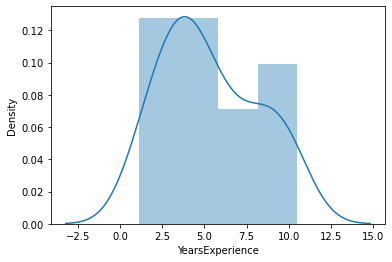

In [28]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

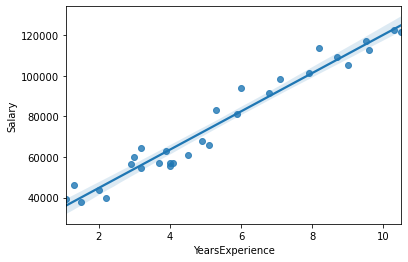

In [29]:
model=smf.ols("Salary~YearsExperience",data=data).fit()
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [30]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [32]:
data1=pd.Series([5])
data_pred=pd.DataFrame(data1,columns=['YearsExperience'])
model.predict(data_pred)

0    73042.011806
dtype: float64

In [33]:
model.rsquared

0.9569566641435086

* Salary hike should go upto 0.9569566641435086